In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Dataset/iRent去識別化數據(僅供本次賽事使用)_20220627/iRent顧客租車交易資料.csv', encoding= 'big5')
print(df.shape)
df.head()

#df.info()

# drop unused column
#df = df.drop(['iRent_6', 'iRent_12'], axis=1)
#df.head()

(403331, 15)


,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_6,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_12,iRent_13,iRent_14,iRent_15
0,A10002139,31-35,M,台北市,文山區,40366241,2021/04/01 18:06:14,516,2021/04/01 18:10:20,2021/04/01 22:12:29,40.0,RCF-6972,TOYOTA/PRIUSc,car,201904
1,A10002478,31-35,M,台北市,中正區,73561565,2021/04/11 11:40:08,37,2021/04/11 11:42:09,2021/04/11 12:06:09,5.5,EWA-0325,KYMCO/MANY-110,motor,201909
2,A10002478,31-35,M,台北市,中正區,113588372,2021/04/24 12:05:24,19,2021/04/24 12:07:29,2021/04/24 12:19:04,2.5,EWH-7300,KYMCO/MANY-110,motor,201911
3,A10002651,31-35,M,新北市,永和區,79976100,2021/04/13 13:36:36,717,2021/04/13 13:40:21,2021/04/13 16:41:53,90.0,RCK-8260,TOYOTA/YARIS,car,201901
4,A10002984,31-35,M,台北市,文山區,58906802,2021/04/06 19:30:49,284,2021/04/06 19:42:04,2021/04/06 20:46:05,45.0,RCF-8171,TOYOTA/PRIUSc,car,201906


In [15]:
df['iRent_1'].value_counts()>200

A5119538      True
A3864461      True
C27878761    False
N81083723    False
F38761443    False
             ...  
A8784891     False
G63426482    False
G63426697    False
G63426764    False
A10002139    False
Name: iRent_1, Length: 122310, dtype: bool

In [7]:
df_car = df[df['iRent_14'] == 'car']
sum(df_car['iRent_8'])/df_car.shape[0]

784.1003637233185

In [8]:
df_car.shape[0]

158912

In [11]:
df_car['iRent_7'].sort_values()

42656     2021/01/31 20:24:40
76420     2021/02/02 10:13:29
4480      2021/02/02 18:22:00
185999    2021/02/03 00:35:26
268974    2021/02/03 11:25:42
                 ...         
201091    2021/04/30 23:21:01
220522    2021/04/30 23:23:21
176879    2021/04/30 23:23:32
13034     2021/04/30 23:25:14
254695    2021/04/30 23:33:19
Name: iRent_7, Length: 158912, dtype: object

In [52]:
#一季
df['iRent_7'].sort_values()

42656     2021/01/31 20:24:40
76420     2021/02/02 10:13:29
4480      2021/02/02 18:22:00
185999    2021/02/03 00:35:26
268974    2021/02/03 11:25:42
                 ...         
264903    2021/04/30 23:49:56
64430     2021/04/30 23:50:07
129614    2021/04/30 23:51:04
22685     2021/04/30 23:51:08
40198     2021/04/30 23:54:58
Name: iRent_7, Length: 403331, dtype: object

In [37]:
df_money = df[(df['iRent_4'] == '台北市')|(df['iRent_4'] == '新北市')]
sum(df_money['iRent_8'])/len(df_money)

348.73942106182324

In [31]:
id_lst = df['iRent_1'].unique()
len(id_lst)

#df['']
#df['iRent_11'] >= 20)

#df.loc[df['iRent_1'].isin(id_lst)]

df_id = df.drop_duplicates(subset = "iRent_1")
df_id.shape

(122310, 15)

In [32]:
len(df_id[(df_id['iRent_4'] == '台北市')|(df_id['iRent_4'] == '新北市')])/len(df_id)

0.5504455890769356

In [34]:
len(df_id[(df_id['iRent_4'] == '台北市')|(df_id['iRent_4'] == '新北市')])

67325

In [40]:
sum(df_id[(df_id['iRent_4'] == '台北市')|(df_id['iRent_4'] == '新北市')]['iRent_8'])/len(df_id[(df_id['iRent_4'] == '台北市')|(df_id['iRent_4'] == '新北市')]['iRent_8'])

641.6529372447085

In [44]:
df['iRent_7'].sort_values()

42656     2021/01/31 20:24:40
76420     2021/02/02 10:13:29
4480      2021/02/02 18:22:00
185999    2021/02/03 00:35:26
268974    2021/02/03 11:25:42
                 ...         
264903    2021/04/30 23:49:56
64430     2021/04/30 23:50:07
129614    2021/04/30 23:51:04
22685     2021/04/30 23:51:08
40198     2021/04/30 23:54:58
Name: iRent_7, Length: 403331, dtype: object

In [4]:
df['iRent_7'].unique

<bound method Series.unique of 0         2021/04/01 18:06:14
1         2021/04/11 11:40:08
2         2021/04/24 12:05:24
3         2021/04/13 13:36:36
4         2021/04/06 19:30:49
                 ...         
403326    2021/04/19 13:07:50
403327    2021/04/26 21:34:31
403328    2021/04/27 12:32:00
403329    2021/04/29 19:32:35
403330    2021/04/30 07:45:28
Name: iRent_7, Length: 403331, dtype: object>

In [5]:
len(df_id[(df_id['iRent_4'] == '台北市')|(df_id['iRent_4'] == '新北市')])

67325

In [45]:
df_id_taipei = df_id[(df_id['iRent_4'] == '台北市')|(df_id['iRent_4'] == '新北市')]
sum(df_id_taipei['iRent_8'])/ len(df_id_taipei)

641.6529372447085

In [7]:
df_taipei_avgcost = df[(df['iRent_4'] == '台北市')|(df['iRent_4'] == '新北市')]['iRent_8']
sum(df_taipei_avgcost)/ len(df_taipei_avgcost)

348.73942106182324

In [50]:
df_id_taipei['iRent_7'].sort_values()

42656     2021/01/31 20:24:40
76420     2021/02/02 10:13:29
185999    2021/02/03 00:35:26
82716     2021/02/03 15:59:59
87181     2021/02/06 16:09:56
                 ...         
51879     2021/04/30 23:31:26
321574    2021/04/30 23:42:28
234695    2021/04/30 23:45:56
182094    2021/04/30 23:47:23
40198     2021/04/30 23:54:58
Name: iRent_7, Length: 67325, dtype: object

In [8]:
2800981+2464452

5265433

<AxesSubplot: ylabel='Age'>

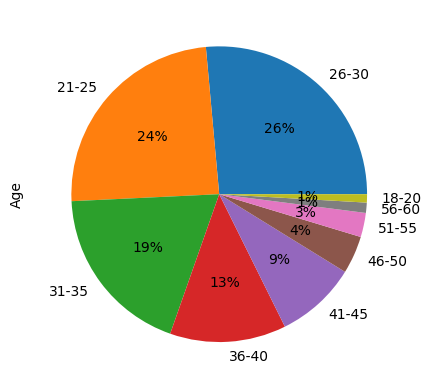

In [4]:
df['iRent_2'].value_counts().plot(kind='pie', label = 'Age', autopct='%1.0f%%')

In [5]:
df_car = df[df['iRent_14'] == 'car']
df_motor = df[df['iRent_14'] == 'motor']

a = len(df_motor[df_motor['iRent_11'] < 20])/ df_motor.shape[0]
print("%.2f" % a)

b = len(df_motor[(df_motor['iRent_11'] >= 20) & (df_motor['iRent_11'] < 100)])/ df_motor.shape[0]
print("%.2f" % b)

c = len(df_motor[df_motor['iRent_11'] > 100])/ df_motor.shape[0]
print("%.2f" % c)

0.99
0.01
0.00


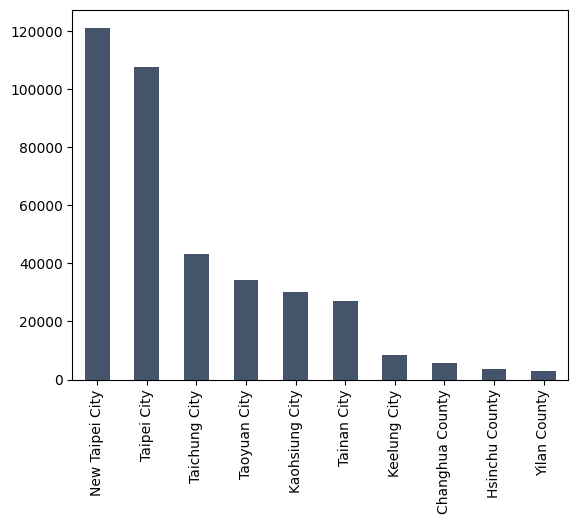

In [29]:

city_chi =list(df['iRent_4'].unique())
city_eng = ['Taipei City', 'New Taipei City', 'Kaohsiung City','Taoyuan City', 'Keelung City', 'Taichung City', 'Hsinchu County','Tainan City',
'Hsinchu City', 'Yunlin County', 'Yilan County', 'Chiayi County', 'Chiayi City', 'Changhua County', 'Nantou County', 'Kinmen County',
'Miaoli County', 'Hualien County', 'Lianjiang County', 'Pingtung County', 'Taitung County', 'Penghu County']

df = df.replace(city_chi, city_eng)
fig = df['iRent_4'].value_counts()[0:10].plot(kind='bar', color='#44546A').figure
#plt.show()
fig.savefig('city.png', bbox_inches='tight', transparent= True)

#plt.show()
#fig.savefig('city.png', transparent=True)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = df[['iRent_2', 'iRent_3','iRent_4','iRent_8','iRent_11', 'iRent_14']]

df = pd.get_dummies(df, columns=['iRent_2', 'iRent_3','iRent_4', 'iRent_14'])
df.head()
#df_con = 
#scaler = StandardScaler()
#scaler.fit_transform(df_train)
#con = df_tok[['iRent_8', 'iRent_11']]
#con = scaler.fit_transform(X_con)
#X_con = pd.DataFrame(X_con, columns=['T000918002','T000918006', 'T000918021', 'T000918025','T000847001'])

,iRent_8,iRent_11,iRent_2_18-20,iRent_2_21-25,iRent_2_26-30,iRent_2_31-35,iRent_2_36-40,iRent_2_41-45,iRent_2_46-50,iRent_2_51-55,...,iRent_4_桃園市,iRent_4_澎湖縣,iRent_4_花蓮縣,iRent_4_苗栗縣,iRent_4_連江縣,iRent_4_金門縣,iRent_4_雲林縣,iRent_4_高雄市,iRent_14_car,iRent_14_motor
0,516,40.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,37,5.5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,19,2.5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,717,90.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,284,45.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(2)
df = pca.fit_transform(df)
df.shape

(403331, 2)

In [21]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label)

[6 4 4 ... 4 4 4]


In [ ]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], )
plt.show()

In [ ]:
#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

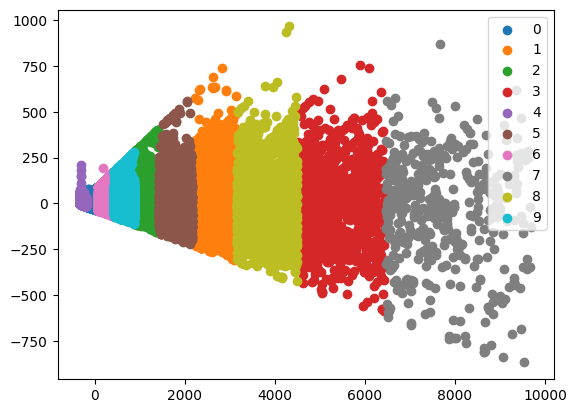

In [25]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

clustering=DBSCAN().fit(df)
Counter(clustering.labels_)

In [19]:
df = pd.DataFrame(df,columns = ['t-SNE-1', 't-SNE-2'])

In [21]:
p = sns.scatterplot(data=df, x="t-SNE-1", y="t-SNE-2", hue=clustering.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

ValueError: Image size of 660x106233 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [97]:
#from matplotlib.font_manager import findfont, FontProperties  


#findfont(FontProperties(family=FontProperties().get_family()))
#myfont = '/Users/linchiatung/.local/share/virtualenvs/HOTAI-xmqxT9Ly/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
#myfont=FontProperties(fname=r'/Users/linchiatung/.local/share/virtualenvs/HOTAI-xmqxT9Ly/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf',size=14)
#sns.set(font=myfont.get_family())
#sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

#sns.countplot(data=df, x="iRent_4", hue="iRent_3")

In [102]:
# 短中長程旅程分析

#fig = sns.histplot(df, x= 'iRent_11', kde= True)
#fig.set_xlim(0,300)
#fig.set_ylim(0,20000)


In [73]:
#import matplotlib
#print(matplotlib.matplotlib_fname())

/Users/linchiatung/.local/share/virtualenvs/HOTAI-xmqxT9Ly/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc


In [11]:
# 尖峰時間用車比較
df[['iRent_7','iRent_9', 'iRent_10']]

,iRent_7,iRent_9,iRent_10
0,2021/04/01 18:06:14,2021/04/01 18:10:20,2021/04/01 22:12:29
1,2021/04/11 11:40:08,2021/04/11 11:42:09,2021/04/11 12:06:09
2,2021/04/24 12:05:24,2021/04/24 12:07:29,2021/04/24 12:19:04
3,2021/04/13 13:36:36,2021/04/13 13:40:21,2021/04/13 16:41:53
4,2021/04/06 19:30:49,2021/04/06 19:42:04,2021/04/06 20:46:05
...,...,...,...
403326,2021/04/19 13:07:50,2021/04/19 13:15:37,2021/04/19 13:29:52
403327,2021/04/26 21:34:31,2021/04/26 21:48:01,2021/04/26 22:00:31
403328,2021/04/27 12:32:00,2021/04/27 12:36:14,2021/04/27 12:57:35
403329,2021/04/29 19:32:35,2021/04/29 19:36:33,2021/04/29 19:51:22


In [34]:
df["iRent_7"] = pd.to_datetime(df["iRent_7"])
df["iRent_9"] = pd.to_datetime(df["iRent_9"])
df["iRent_10"] = pd.to_datetime(df["iRent_10"])
df['Travel_time'] = (df["iRent_10"] - df["iRent_9"])/ np.timedelta64(1, 'm')
df.head()

,iRent_1,iRent_2,iRent_3,iRent_4,iRent_5,iRent_7,iRent_8,iRent_9,iRent_10,iRent_11,iRent_13,iRent_14,Travel_time
0,A10002139,31-35,M,台北市,文山區,2021-04-01 18:06:14,516,2021-04-01 18:10:20,2021-04-01 22:12:29,40.0,TOYOTA/PRIUSc,car,242.150000
1,A10002478,31-35,M,台北市,中正區,2021-04-11 11:40:08,37,2021-04-11 11:42:09,2021-04-11 12:06:09,5.5,KYMCO/MANY-110,motor,24.000000
2,A10002478,31-35,M,台北市,中正區,2021-04-24 12:05:24,19,2021-04-24 12:07:29,2021-04-24 12:19:04,2.5,KYMCO/MANY-110,motor,11.583333
3,A10002651,31-35,M,新北市,永和區,2021-04-13 13:36:36,717,2021-04-13 13:40:21,2021-04-13 16:41:53,90.0,TOYOTA/YARIS,car,181.533333
4,A10002984,31-35,M,台北市,文山區,2021-04-06 19:30:49,284,2021-04-06 19:42:04,2021-04-06 20:46:05,45.0,TOYOTA/PRIUSc,car,64.016667


(0.0, 30000.0)

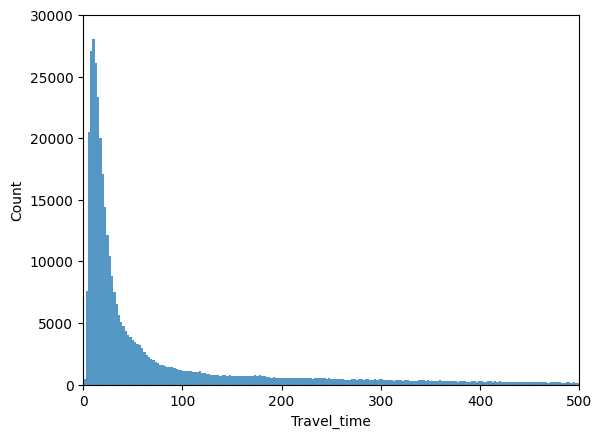

In [39]:
fig = sns.histplot(df, x= 'Travel_time')
fig.set_xlim(0,500)
fig.set_ylim(0,30000)